In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1 as f1
import fastf1.plotting
from fastf1.core import Laps
import numpy as np

In [2]:
# Enable Matplotlib patches for plotting timedelta values
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

In [3]:
# Cargamos una carpeta cache para guardar los datos descargados
f1.Cache.enable_cache('cache')

In [4]:
# Cargamos los datos del LAS VEGAS GRAND PRIX 2024 (Qualifying)
qualy = f1.get_session(2024, 22, 'Q')
qualy.event.OfficialEventName

'FORMULA 1 HEINEKEN SILVER LAS VEGAS GRAND PRIX 2024'

In [5]:
# Cargamos la informacion de la clasificacion
qualy.load()

core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INF

## Diferencia de la vuelta más rapida de cada piloto con la vuelta de pole

In [9]:
# Armamos un Pandas con todos los pilotos
drivers = pd.unique(qualy.laps['Driver'])
print(drivers)

# Seleccionamos la vuelta más rapida de cada piloto, las ordenamos y las reseteamos
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = qualy.laps.pick_drivers(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps) \
    .sort_values(by='LapTime') \
    .reset_index(drop=True)
    
# Calculamos la diferencia de tiempo con la vuelta de pole
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

['RUS' 'SAI' 'GAS' 'LEC' 'VER' 'NOR' 'TSU' 'PIA' 'HUL' 'HAM' 'OCO' 'MAG'
 'ZHO' 'COL' 'LAW' 'PER' 'ALO' 'ALB' 'BOT' 'STR']


In [10]:
# Mostramos la tabla obtenida
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     RUS 0 days 00:01:32.312000        0 days 00:00:00
1     SAI 0 days 00:01:32.410000 0 days 00:00:00.098000
2     HAM 0 days 00:01:32.567000 0 days 00:00:00.255000
3     GAS 0 days 00:01:32.664000 0 days 00:00:00.352000
4     LEC 0 days 00:01:32.783000 0 days 00:00:00.471000
5     VER 0 days 00:01:32.797000 0 days 00:00:00.485000
6     NOR 0 days 00:01:33.008000 0 days 00:00:00.696000
7     PIA 0 days 00:01:33.024000 0 days 00:00:00.712000
8     TSU 0 days 00:01:33.029000 0 days 00:00:00.717000
9     HUL 0 days 00:01:33.062000 0 days 00:00:00.750000
10    OCO 0 days 00:01:33.221000 0 days 00:00:00.909000
11    MAG 0 days 00:01:33.297000 0 days 00:00:00.985000
12    ZHO 0 days 00:01:33.566000 0 days 00:00:01.254000
13    COL 0 days 00:01:33.746000 0 days 00:00:01.434000
14    LAW 0 days 00:01:34.087000 0 days 00:00:01.775000
15    PER 0 days 00:01:34.155000 0 days 00:00:01.843000
16    ALO 0 days 00:01:34.258000 0 days 00:00:01

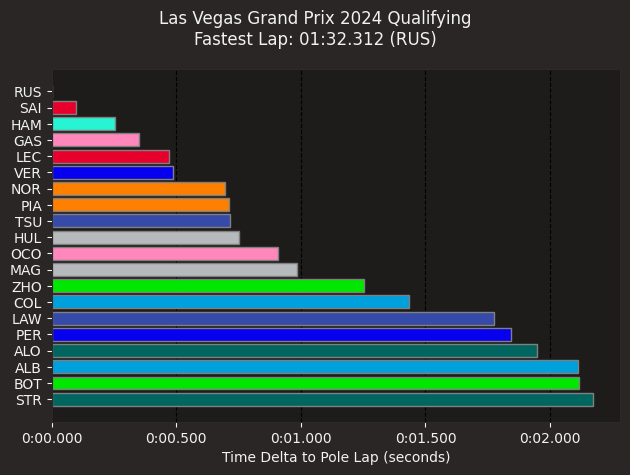

In [12]:
# Inicializamos una lista de colores para cada equipo
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=qualy)
    team_colors.append(color)

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# Invertimos el eje y para que el piloto más rápido esté en la parte superior
ax.invert_yaxis()

# Mostramos lineas de la cuadrícula
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

ax.set_xlabel('Time Delta to Pole Lap (seconds)')
plt.suptitle(f"{qualy.event['EventName']} {qualy.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/22_LAS VEGAS/graphics/qualy/timedelta_polelap.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

## Sectores más rapidos

In [14]:
pilotos = [
    qualy.laps.pick_drivers('RUS').pick_fastest(),
    qualy.laps.pick_drivers('SAI').pick_fastest(),
    qualy.laps.pick_drivers('HAM').pick_fastest(),
    qualy.laps.pick_drivers('GAS').pick_fastest(),
    qualy.laps.pick_drivers('LEC').pick_fastest(),
    qualy.laps.pick_drivers('VER').pick_fastest(),
    qualy.laps.pick_drivers('NOR').pick_fastest(),
    qualy.laps.pick_drivers('PIA').pick_fastest(),
    qualy.laps.pick_drivers('TSU').pick_fastest(),
    qualy.laps.pick_drivers('HUL').pick_fastest(),
    qualy.laps.pick_drivers('OCO').pick_fastest(),
    qualy.laps.pick_drivers('MAG').pick_fastest(),
    qualy.laps.pick_drivers('ZHO').pick_fastest(),
    qualy.laps.pick_drivers('COL').pick_fastest(),
    qualy.laps.pick_drivers('LAW').pick_fastest(),
    qualy.laps.pick_drivers('PER').pick_fastest(),
    qualy.laps.pick_drivers('ALO').pick_fastest(),
    qualy.laps.pick_drivers('ALB').pick_fastest(),
    qualy.laps.pick_drivers('BOT').pick_fastest(),
    qualy.laps.pick_drivers('STR').pick_fastest()
    ]

In [15]:
# Extraemos los tiempos de cada sector para cada piloto
sector1_times = [lap['Sector1Time'].total_seconds() for lap in pilotos]
sector2_times = [lap['Sector2Time'].total_seconds() for lap in pilotos]
sector3_times = [lap['Sector3Time'].total_seconds() for lap in pilotos]
drivers = [lap['Driver'] for lap in pilotos]

C:\Users\Laura\AppData\Local\Temp\ipykernel_8544\896425215.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_drivers_s1, rotation=45)
C:\Users\Laura\AppData\Local\Temp\ipykernel_8544\896425215.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(sorted_drivers_s2, rotation=45)
C:\Users\Laura\AppData\Local\Temp\ipykernel_8544\896425215.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(sorted_drivers_s3, rotation=45)


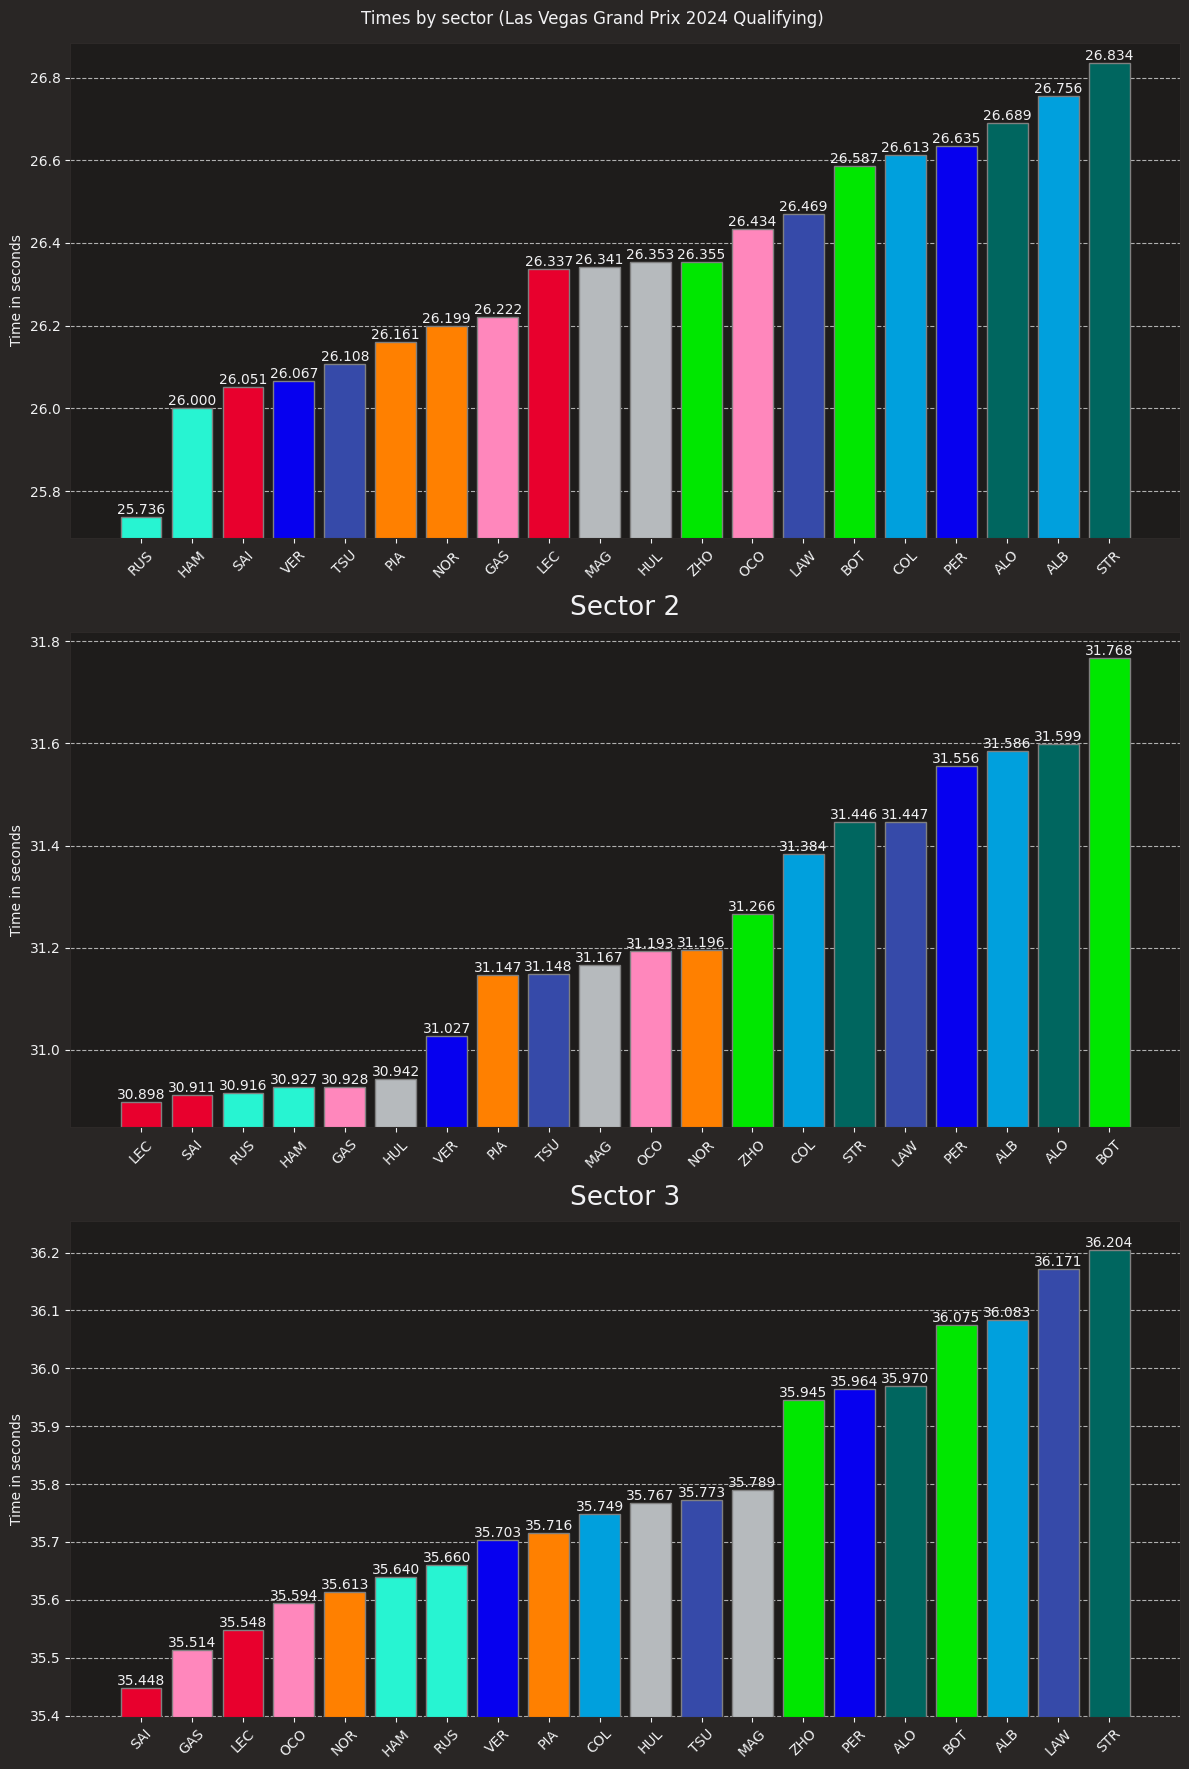

In [16]:
# Configuramos el gráfico de barras
x = np.arange(len(drivers))  # la posición de los pilotos en el eje x

# Ordenamos los tiempos de cada sector de menor a mayor
sorted_indices_s1 = np.argsort(sector1_times)
sorted_indices_s2 = np.argsort(sector2_times)
sorted_indices_s3 = np.argsort(sector3_times)

# Reordenamos los tiempos y los pilotos
sorted_sector1_times = np.array(sector1_times)[sorted_indices_s1]
sorted_sector2_times = np.array(sector2_times)[sorted_indices_s2]
sorted_sector3_times = np.array(sector3_times)[sorted_indices_s3]
sorted_drivers_s1 = np.array(drivers)[sorted_indices_s1]
sorted_drivers_s2 = np.array(drivers)[sorted_indices_s2]
sorted_drivers_s3 = np.array(drivers)[sorted_indices_s3]
sorted_team_colors_s1 = np.array(team_colors)[sorted_indices_s1]
sorted_team_colors_s2 = np.array(team_colors)[sorted_indices_s2]
sorted_team_colors_s3 = np.array(team_colors)[sorted_indices_s3]

# Creamos un gráfico con 3 subgráficos
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle(f'Times by sector ({qualy.event["EventName"]} {qualy.event.year} Qualifying) \n')

# Gráfico para el Sector 1
bars1 = ax1.bar(sorted_drivers_s1, sorted_sector1_times, color=sorted_team_colors_s1, edgecolor='grey')
ax1.set_ylabel('Time in seconds')
ax1.set_xticklabels(sorted_drivers_s1, rotation=45)
ax1.set_ylim(sorted_sector1_times[0] - 0.05, sorted_sector1_times[-1] + 0.05)
ax1.yaxis.grid(True, linestyle='--')

# Añadimos los tiempos encima de cada barra
for bar, time in zip(bars1, sorted_sector1_times):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{time:.3f}', ha='center', va='bottom')

# Gráfico para el Sector 2
bars2 = ax2.bar(sorted_drivers_s2, sorted_sector2_times, color=sorted_team_colors_s2, edgecolor='grey')
ax2.set_ylabel('Time in seconds')
ax2.set_title('Sector 2')
ax2.set_xticklabels(sorted_drivers_s2, rotation=45)
ax2.set_ylim(sorted_sector2_times[0] - 0.05, sorted_sector2_times[-1] + 0.05)
ax2.yaxis.grid(True, linestyle='--')

# Añadimos los tiempos encima de cada barra
for bar, time in zip(bars2, sorted_sector2_times):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{time:.3f}', ha='center', va='bottom')

# Gráfico para el Sector 3
bars3 = ax3.bar(sorted_drivers_s3, sorted_sector3_times, color=sorted_team_colors_s3, edgecolor='grey')
ax3.set_ylabel('Time in seconds')
ax3.set_title('Sector 3')
ax3.set_xticklabels(sorted_drivers_s3, rotation=45)
ax3.set_ylim(sorted_sector3_times[0] - 0.05, sorted_sector3_times[-1] + 0.05)
ax3.yaxis.grid(True, linestyle='--')

# Añadimos los tiempos encima de cada barra
for bar, time in zip(bars3, sorted_sector3_times):
    ax3.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{time:.3f}', ha='center', va='bottom')

# Ajustamos el layout para que no se solapen los subgráficos
path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/22_LAS VEGAS/graphics/qualy/fast_sectors.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

## Velocidad maxima conseguida por cada piloto

In [17]:
# Lista donde guardaremos los datos de velocidad maxima obtenida por cada piloto y el estado del DRS
tel_pilotos = []

# Como ya tenemos una lista que contiene la vuelta más rapida de cada piloto, vamos a iterar sobre ella
#para extraer la telemetria de cada piloto y obtener la velocidad máxima y el estado del DRS
for piloto in pilotos:
    aux = piloto.get_car_data().add_distance()
    pilot = piloto["Driver"]
    maximo = aux["Speed"].max()
    drs_status = aux.loc[aux['Speed'] == maximo, 'DRS'].values

    # Condicionales para identificar el estado del DRS
    if (drs_status == 8).any():
        drs = "Desactivado"
    elif np.isin(drs_status, [10, 12, 14]).any():
        drs = "Activado"
    else:
        drs = "Desconocido"
        
# Finalmente añaadimos los datos a la lista
    tel_pilotos.append([pilot, maximo, drs])

In [18]:
# Ordenamos la lista tel_pilotos por la velocidad máxima
tel_pilotos_sorted = sorted(tel_pilotos, key=lambda x: x[1], reverse=True)

# Invertir el orden de los datos para que sea de mayor a menor en el grafico
tel_pilotos_sorted.reverse()

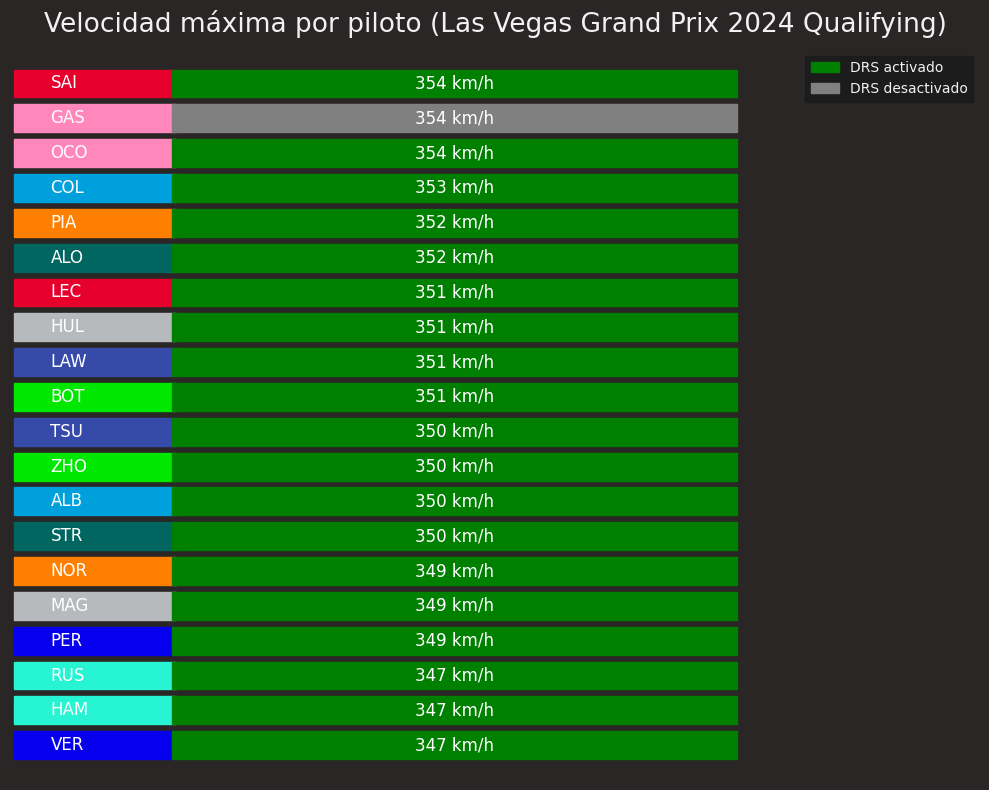

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))

# Definir los colores para el DRS activado y desactivado
drs_colors = {'Activado': 'green', 'Desactivado': 'grey', 'Desconocido': 'grey'}

# Iterar sobre los datos de los pilotos y sus velocidades
for i, (pilot, speed, drs) in enumerate(tel_pilotos_sorted):
    
    # Obtener el color del equipo del piloto
    team_color = fastf1.plotting.get_team_color(qualy.laps.pick_drivers(pilot).pick_fastest()['Team'], session=qualy)
    
    # Dibujar el rectángulo con el nombre del piloto
    ax.add_patch(plt.Rectangle((0.1, i-0.4), 4, 0.8, color=team_color))
    ax.text(1, i, pilot, va='center', ha='left', fontsize=12, color='white')
    
    # Dibujar el rectángulo con la velocidad
    rect_color = drs_colors[drs]
    ax.add_patch(plt.Rectangle((4, i-0.4), 14, 0.8, color=rect_color))
    
    # Dibujar la velocidad dentro del rectángulo
    ax.text(4 + 7, i, f'{speed} km/h', va='center', ha='center', fontsize=12, color='white')

# Configurar gráfico
ax.title.set_text(f'Velocidad máxima por piloto ({qualy.event["EventName"]} {qualy.event.year} Qualifying)')
ax.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='green', label='DRS activado'),
                   plt.Rectangle((0, 0), 1, 1, color='grey', label='DRS desactivado')],
            loc='upper right')
ax.set_xlim(0, 24)
ax.set_ylim(-1, len(tel_pilotos_sorted))
ax.axis('off')

path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/22_LAS VEGAS/graphics/qualy/top_speeds.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

## Comparación de vuelta rapida de los pilotos de Williams:

In [22]:
# Seleccionamos la vuelta más rapida de cada piloto de Williams
col_vuelta = qualy.laps.pick_drivers('COL').pick_fastest()
alb_vuelta = qualy.laps.pick_drivers('ALB').pick_fastest()

# Telemetria de la vuelta más rapida de cada uno
col_tel = col_vuelta.get_car_data().add_distance()
alb_tel = alb_vuelta.get_car_data().add_distance()

# Informacion del circuito
circuit_info = qualy.get_circuit_info()

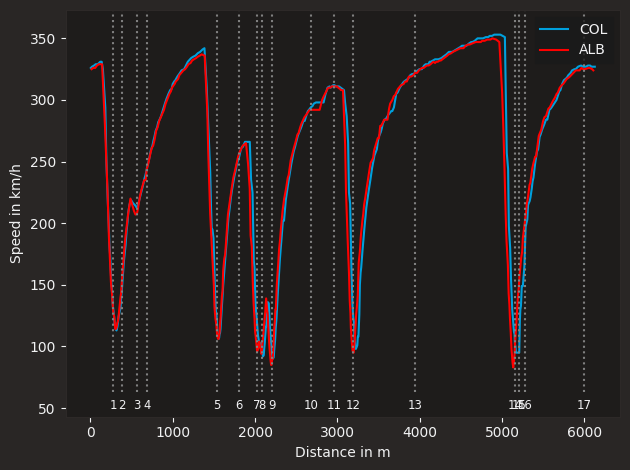

In [23]:
col_color = fastf1.plotting.get_team_color(col_vuelta['Team'], session=qualy)
alb_color = "red"

# Crear el gráfico
fig, ax = plt.subplots()

# Agregar la telemetría de Colapinto
ax.plot(col_tel['Distance'], col_tel['Speed'], color=col_color, label=col_vuelta['Driver'])

# Agregar la telemetría de Albon
ax.plot(alb_tel['Distance'], alb_tel['Speed'], color=alb_color, label=alb_vuelta['Driver'])

# Agregar líneas verticales para cada curva
v_min = min(col_tel['Speed'].min(), alb_tel['Speed'].min())
v_max = max(col_tel['Speed'].max(), alb_tel['Speed'].max())
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Enumerar las curvas
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt, va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Agrandar los límites del eje Y para mejorar la visualización
ax.set_ylim([v_min - 40, v_max + 20])

path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/22_LAS VEGAS/graphics/qualy/COL_vs_ALB.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

### Comparación de velocidad en la vuelta más rapida de Russell y Colapinto

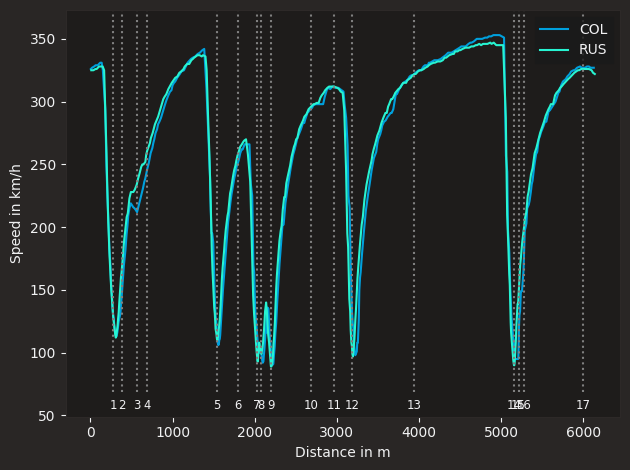

In [25]:
# Obtener la vuelta más rápida de Russell
rus_vuelta = qualy.laps.pick_drivers('RUS').pick_fastest()
rus_tel = rus_vuelta.get_car_data().add_distance()

# Obtener el color del equipo de Russell
rus_color = fastf1.plotting.get_team_color(rus_vuelta['Team'], session=qualy)

# Crear el gráfico
fig, ax = plt.subplots()

# Agregar la telemetría de Colapinto
ax.plot(col_tel['Distance'], col_tel['Speed'], color=col_color, label=col_vuelta['Driver'])

# Agregar la telemetría de Russell
ax.plot(rus_tel['Distance'], rus_tel['Speed'], color=rus_color, label=rus_vuelta['Driver'])

# Agregar líneas verticales para cada curva
v_min = min(col_tel['Speed'].min(), rus_tel['Speed'].min())
v_max = max(col_tel['Speed'].max(), rus_tel['Speed'].max())
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Enumerar las curvas
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt, va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Agrandar los límites del eje Y para mejorar la visualización
ax.set_ylim([v_min - 40, v_max + 20])

path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/22_LAS VEGAS/graphics/qualy/COL_vs_RUS.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()